Gradiente Descendente é um algoritmo de otimização que encontra os melhores valores para os parâmetros w e B, minimizando a minha função de custo.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

Dataset do Kaggle que nos dá o total de vendas de diferentes produtos, depois de comercializá-los na Televisão, Rádio e Jornal. Usando o algoritmo podemos descobrir qual mídia tem o melhor desempenho para as vendas e atribuir pesos a todas as mídias de acordo. Link: https://www.kaggle.com/sazid28/advertising.csv

In [58]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


X representaria TV, Rádio e Jornal enquanto Y representaria nossas vendas. Como todas essas vendas podem estar em escalas diferentes, então normalizamos nossas variáveis ​​X e Y.

In [59]:
X = df[["TV", "radio", "newspaper"]]
Y = df["sales"]
Y = np.array((Y-Y.mean())/Y.std())
X = X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

Algoritmo que o dataset foi "tratado" podemos começar a implementar o algoritmo. Para implementar o algoritmo de Gradiente Descendente é necessário seguir 4 passos:

1. Iniciar aleatoriamente o bias e o peso.
2. Calcular o valor de previsto de y que é dado pelo bias e o peso.
3. Calcular a função de custo a partir dos valores previstos e reais de Y. 
4. Calcular o grandiente e os pesos. 

In [60]:
# calculando aleatoriamente os valores do bias e do weights

def initialize(dim):

    b = random.random()
    theta = np.random.rand(dim)
    return b,theta

b, theta = initialize(3)
print("Bias: ", b, "Weights: ", theta)

Bias:  0.8621605448719112 Weights:  [0.81046388 0.35227044 0.4714903 ]


In [61]:
# calcular o output Y usando os valores do bias e do weights que foram gerados acima
def predict_Y(b, theta, X):

    return b + np.dot(X,theta)

Y_hat = predict_Y(b, theta, X)
Y_hat[0:10]


array([ 2.82777512,  0.58955552,  1.01235313,  1.93718905,  1.48794217,
        1.12669478,  0.09042662,  0.11149216, -1.58671623,  0.6673894 ])

Y_hat é o valor de saída previsto enquanto Y será o valor real. A diferença entre eles nos dará a função de custo. Que será calculado na próxima função. 

Y_hat é o valor de saída previsto enquanto Y será o valor real. A diferença entre eles nos dará nossa função de custo. Que será calculada em nossa próxima função. 

In [62]:
def get_cost(Y, Y_hat):

    Y_resd = Y - Y_hat
    
    return np.sum(np.dot(Y_resd.T, Y_resd)) / len(Y - Y_resd)

Y_hat = predict_Y(b, theta, X)

get_cost(Y, Y_hat)

1.0480723798189358

Essa é a nossa função de custo, e devemos reduzir ela o quanto for possível para ter uma predição mais precisas. Para atualizar o bias e o weights nós usamos a fórmula do gradiente descendente: θj = θj - α  δ/δθ J(θ0, θ1)

Os parâmetros passados para a nossa função são:
1. x, y: varáveis de input output
2. y_hat: valor predito com o bias e o weight atualizados
3. b_O, theta_O: bias e weights atuais 
4. Learning rate, para ajustar a etapa de atualização 

In [63]:
def update_theta(x, y, y_hat, b_0, theta_o, learning_rate):

    db = (np.sum(y_hat-y)*2) /len(y)
    dw = (np.dot((y_hat-y),x)*2) /len(y)
    b_1 = b_0-learning_rate * db
    theta_1 = theta_o-learning_rate * dw

    return b_1, theta_1

print("After initialization -Bias: ", b, "theta: ", theta)

Y_hat = predict_Y(b, theta, X)

b, theta = update_theta(X, Y, Y_hat, b, theta, 0.01)
print("After first update -Bias: ", b, "theta: ", theta)
get_cost(Y, Y_hat)

After initialization -Bias:  0.8621605448719112 theta:  [0.81046388 0.35227044 0.4714903 ]
After first update -Bias:  0.844917333974473 theta:  [0.80898619 0.35252069 0.46325483]


1.0480723798189358

Como podemos ver, a função de cust foi reduzida com o novo bias e weights. Atualmente o learning rate é de 0,001, agora tentaremos com 0,01 para ver se esse pode ser um learning rate melhor e mais ideal. 

Agora que criamos todas as funções necessárias, podemos criar uma função principal de gradiente descendente, que as executa para um número específico de iteração e nos encontra o bias e o weights ideias. Para esta implementação, estamos executando a função por 200 iterações.

In [64]:
def run_gradient_descent(X, Y, alpha, num_iterations):

    b,theta = initialize(X.shape[1])
    iter_num = 0
    gd_iterations_df = pd.DataFrame(columns = ["iteration", "cost"])
    result_idx = 0

    for each_iter in range(num_iterations):
        Y_hat = predict_Y(b, theta, X)
        this_cost = get_cost(Y, Y_hat)
        prev_b = b
        prev_theta = theta
        b,theta = update_theta(X, Y, Y_hat, prev_b, prev_theta, alpha)

        if(iter_num % 10 == 0):
            gd_iterations_df.loc[result_idx] = [iter_num,this_cost]
            result_idx = result_idx + 1
        iter_num += 1
        
    print("Final Estimate of b and theta : ", b, theta)
    return gd_iterations_df, b, theta

gd_iterations_df, b, theta = run_gradient_descent(X, Y, alpha = 0.001, num_iterations = 200)

Final Estimate of b and theta :  0.5623846652030714 [0.36592837 0.6577425  0.3077309 ]


O theta é uma lista com 3 números, pois temos 3 inputs, TV, radio e newspaper. A cada iteração a função de custo diminui.

In [65]:
gd_iterations_df.head()

,iteration,cost
0,0.0,1.440491
1,10.0,1.385871
2,20.0,1.333519
3,30.0,1.283339
4,40.0,1.235239


Text(0, 0.5, 'Cost or MSE')

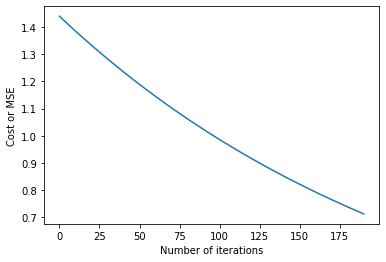

In [66]:
plt.plot(gd_iterations_df["iteration"], gd_iterations_df["cost"])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

Como podemos ver a função de custo diminui com o aumento das iterações, mas ainda não alcançamos a convergência. Agora, vamos tentar com α = 0.01 para 2000 iterações e comparar com α=0.001 e encontrar com learning rate é o melhor para esse dataset.

Final Estimate of b and theta :  -3.863757224794852e-17 [ 0.75306591  0.53648155 -0.00433069]
Final Estimate of b and theta :  0.012979307196459117 [0.75476984 0.501681   0.02949561]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

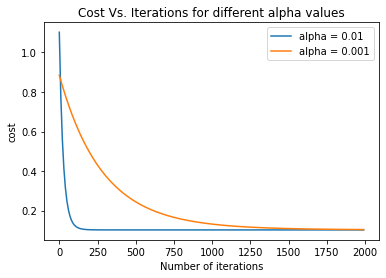

In [67]:
alpha_df_1, b, theta = run_gradient_descent(X, Y, alpha = 0.01, num_iterations = 2000)
alpha_df_2, b, theta = run_gradient_descent(X, Y, alpha = 0.001, num_iterations = 2000)
plt.plot(alpha_df_1["iteration"], alpha_df_1["cost"], label = "alpha = 0.01")
plt.plot(alpha_df_2["iteration"], alpha_df_2["cost"], label = "alpha = 0.001")
plt.legend()
plt.ylabel("cost")
plt.xlabel("Number of iterations")
plt.title("Cost Vs. Iterations for different alpha values")

Como podemos ver 0,01 (azul) é o learning rate mais ideal, pois converge muito mais rápido que 0,001 (laranja). O learning rate em azul converge em torno de 100 iterações, enquanto o learning rate em laranja converge em torno de 1000 iterações. 

- Conclusão: o algoritmo de gradiente descendente foi construído com sucesso. 
- Lembrete: o learning rate será diferente para cada conjunto de dados. 